# EDA on the `MLA_100k_checked_v3` dataset

In [ ]:
import pandas as pd
from utils import *

## Load the dataset

In [3]:
X_dataframe = pd.read_csv("../data/X_dataframe.csv")
X_dataframe.head()

,seller_address,warranty,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,price,attributes,...,secure_thumbnail,stop_time,status,video_id,catalog_product_id,initial_quantity,start_time,sold_quantity,available_quantity,used
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,80.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,NaN,NaN,1,1441485773000,0,1,False
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,2650.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,NaN,NaN,1,1443290910000,0,1,True
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,60.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,NaN,NaN,1,1441843027000,0,1,True
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,580.0,[],...,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,NaN,NaN,1,1443466076000,0,1,False
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,30.0,[],...,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,NaN,NaN,1,1440454040000,0,1,True


# Parent item ID

In [4]:
X_dataframe["parent_item_id"].describe()

count             69310
unique            69310
top       MLA6553902747
freq                  1
Name: parent_item_id, dtype: object

In [5]:
X_dataframe["parent_item_id"].value_counts()

parent_item_id
MLA6553902747    1
MLA4317323376    1
MLA3842402942    1
MLA6950118955    1
MLA2431639060    1
                ..
MLA2301627608    1
MLA5909068300    1
MLA7790783866    1
MLA4750597465    1
MLA3661010119    1
Name: count, Length: 69310, dtype: int64

In [6]:
X_dataframe["parent_item_id"].isnull().sum()

np.int64(20690)

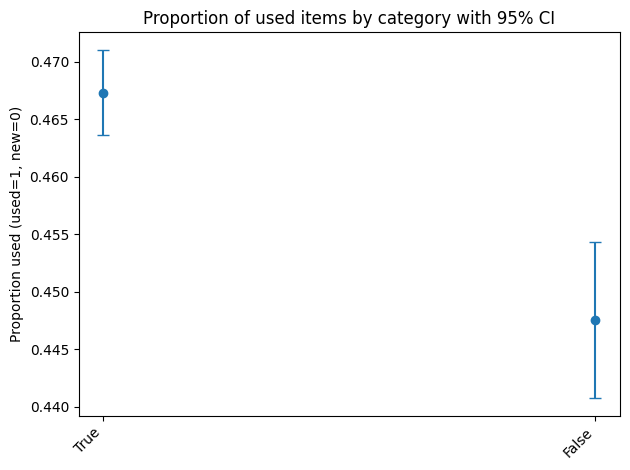

In [7]:
X_dataframe["has_parent_item_id"] = X_dataframe["parent_item_id"].notna()
res = column_analysis("has_parent_item_id", X_dataframe)
plot_column_analysis(res)


There's a slightly different distribution if the item has a parent id

# Category ID

In [8]:
X_dataframe["category_id"].describe()

count       90000
unique      10491
top       MLA1227
freq         4139
Name: category_id, dtype: object

In [196]:
X_dataframe["category_id"].value_counts()[:50]

category_id
MLA1227      4139
MLA2044      1759
MLA41287      829
MLA3530       685
MLA2038       601
MLA15171      522
MLA15328      446
MLA1383       416
MLA41269      399
MLA15204      395
MLA3361       389
MLA2032       386
MLA85960      344
MLA41064      333
MLA119287     330
MLA6651       323
MLA1963       310
MLA41185      288
MLA26536      288
MLA3936       281
MLA60611      275
MLA4335       261
MLA41174      257
MLA41260      255
MLA41083      253
MLA15226      251
MLA5496       234
MLA11456      231
MLA1207       229
MLA352293     224
MLA40497      222
MLA1914       221
MLA1902       219
MLA1635       208
MLA2039       201
MLA2042       195
MLA6009       194
MLA41173      193
MLA15197      189
MLA1474       189
MLA40507      186
MLA86029      185
MLA41112      179
MLA1468       178
MLA7251       176
MLA7373       174
MLA5500       174
MLA40547      170
MLA12812      165
MLA370638     163
Name: count, dtype: int64

In [9]:
X_dataframe["category_id"].isnull().sum()

np.int64(0)

In [18]:
popular_categories = (
    X_dataframe["category_id"].value_counts().loc[lambda x: x > 100].index
)
X_dataframe["popular_category"] = X_dataframe["category_id"].apply(
    lambda x: x in popular_categories
)
X_dataframe["popular_category"].value_counts()


popular_category
False    63769
True     26231
Name: count, dtype: int64

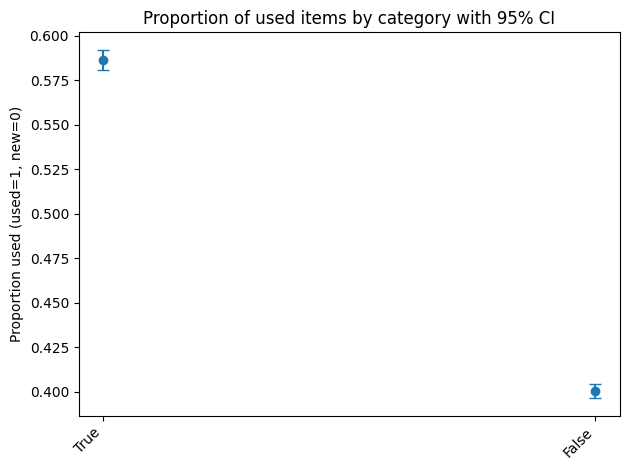

In [17]:
res = column_analysis("popular_category", X_dataframe)
plot_column_analysis(res)

Different distribution for popular categories